# Bedmachine Grids
**Description:**  Gridded data in EPSG 3031 projection. Topographic layers, uncertainties, and masks.

Requires an EarthData login, see [link](../../how_to/download_NASA_data.ipynb) for how to configure this. 

**Dataset:** 

Morlighem, M. “MEaSUREs BedMachine Antarctica, Version 3.” NASA Snow and Ice Data Center Distributed Active Archive Center, 2022. https://nsidc.org/data/nsidc-0756/versions/3.

**Associated paper:** 

Morlighem, Mathieu, Eric Rignot, Tobias Binder, Donald Blankenship, Reinhard Drews, Graeme Eagles, Olaf Eisen, et al. “Deep Glacial Troughs and Stabilizing Ridges Unveiled beneath the Margins of the Antarctic Ice Sheet.” Nature Geoscience 13, no. 2 (2020): 132–37. https://doi.org/10.1038/s41561-019-0510-8.



In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [2]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # uncertainties
    "errbed",
    # others
    "thickness",
    "dataid",
    "firn",
    "geoid",
    "mask",
    "source",
]

grids = []
for name in layer_names:
    data = fetch.bedmachine(
        layer=name,
        hemisphere="south",
        # available options
        # reference ("eigen-6c4" or "ellipsoid")
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 4818.15576172
grid registration: g
##########


Info for icebase


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -3827.19604492
grid zmax: 4818.15576172
grid registration: g
##########


Info for bed


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -8166.31542969
grid zmax: 4818.15576172
grid registration: g
##########


Info for errbed


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 10.0
grid zmax: 1000.0
grid registration: g
##########


Info for thickness


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 4822.79492188
grid registration: g
##########


Info for dataid


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 10.0
grid registration: g
##########


Info for firn


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 50.9211807251
grid registration: g
##########


Info for geoid


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -66.0
grid zmax: 52.0
grid registration: g
##########


Info for mask


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 4.0
grid registration: g
##########


Info for source


grid spacing: 500.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 1.0
grid zmax: 10.0
grid registration: g
##########


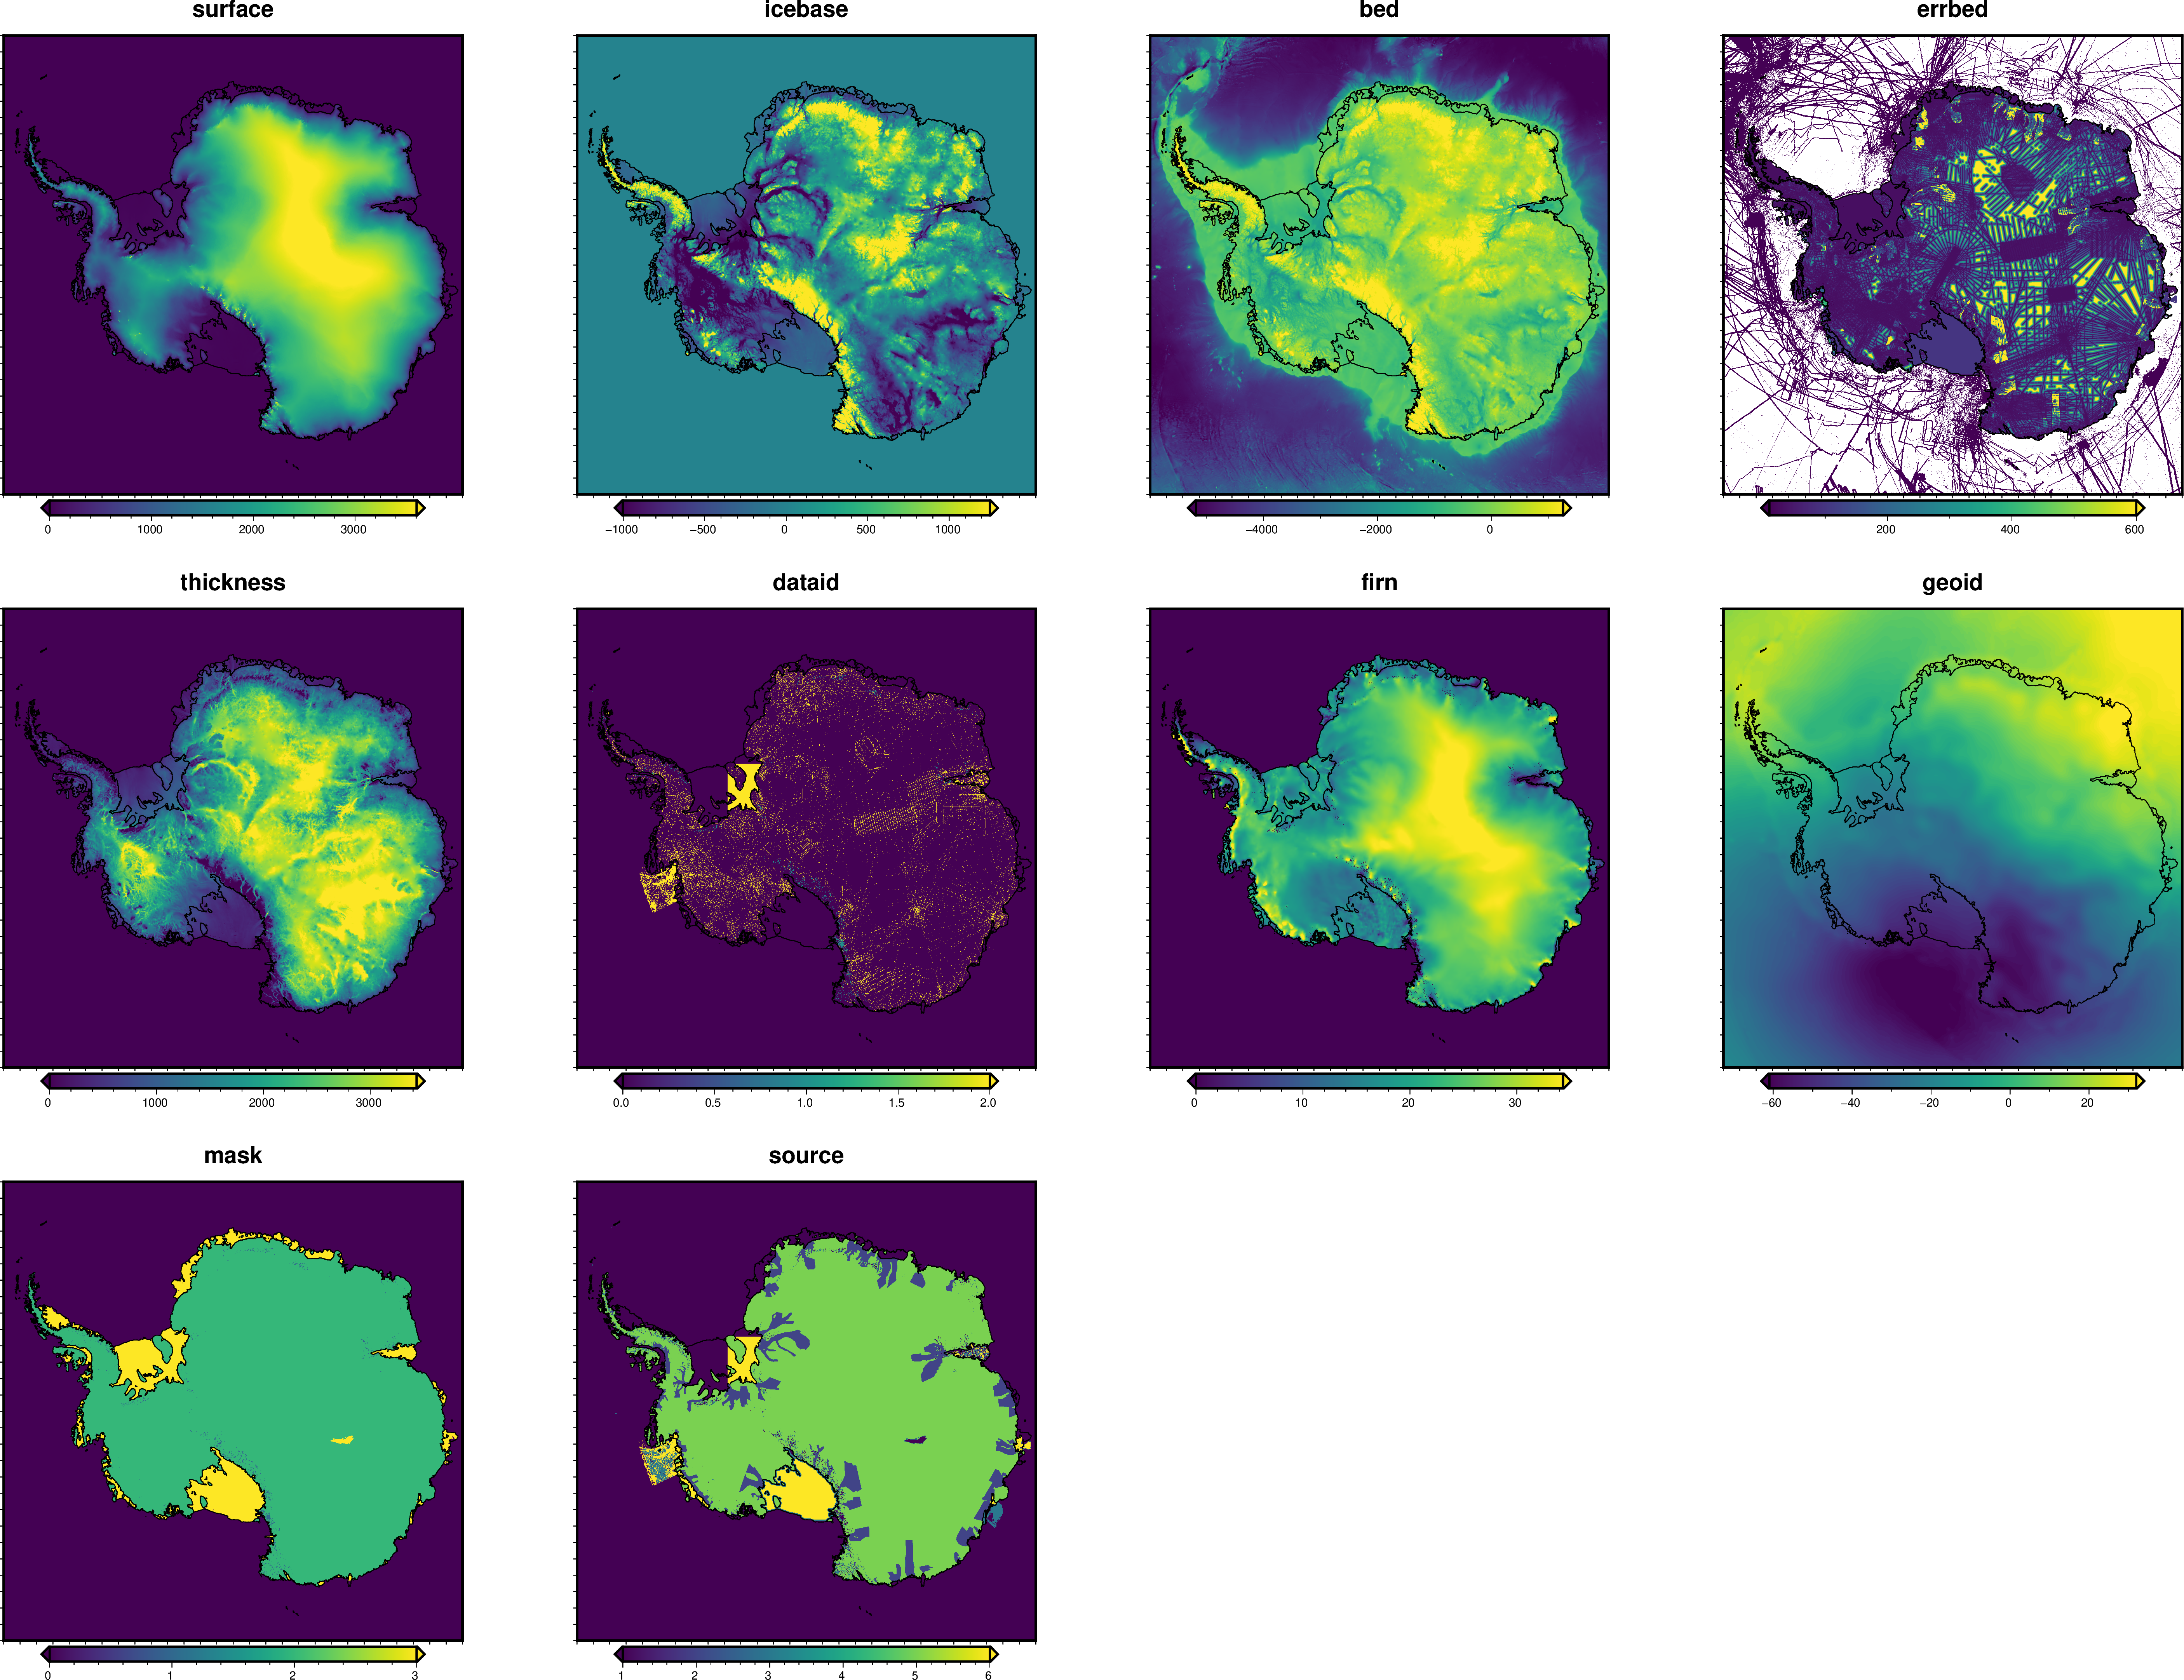

In [3]:
subplot_dimensions = utils.square_subplots(len(layer_names))

region = regions.antarctica
_, _, fig_width, fig_height = utils.set_proj(
    region,
    hemisphere="south",
    fig_height=15,
)

fig = pygmt.Figure()

with fig.subplot(
    nrows=subplot_dimensions[0],
    ncols=subplot_dimensions[1],
    subsize=(fig_width, fig_height),
    frame="f",
    margins="1.5c",
):
    for i, (layer, grid) in enumerate(zip(layer_names, grids)):
        with fig.set_panel(panel=i):
            # plot the grids
            maps.plot_grd(
                grid,
                fig=fig,
                title=layer,
                origin_shift=None,
                region=region,
                coast=True,
                robust=True,
                hemisphere="south",
            )
fig.show(dpi=200)